In [2]:
import pandas as pd

# Load the dataset
file_path = 'CTG.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check the structure of the dataset
print(data.info())


       FileName       Date      SegFile      b       e    LBE     LB   AC  \
0  Variab10.txt  12/1/1996  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   
4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
2  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[5 rows x 40 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data col

In [5]:
#a1-1import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'CTG.csv'
data = pd.read_csv(file_path)

# Impute missing values in "Mean" and "Max" with the mean of each column
imputer = SimpleImputer(strategy='mean')
data[['Mean', 'Max']] = imputer.fit_transform(data[['Mean', 'Max']])

# Define the feature (X) and target (y)
X = data[['Mean']]  # Feature: Mean
y = data['Max']     # Target: Max

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = reg.predict(X_train)

# Make predictions on the test set
y_test_pred = reg.predict(X_test)

# Evaluate the model performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training set Mean Squared Error:", mse_train)
print("Test set Mean Squared Error:", mse_test)


Training set Mean Squared Error: 302.13498864222413
Test set Mean Squared Error: 339.9050590818553


Accuracy with LBE: 0.67


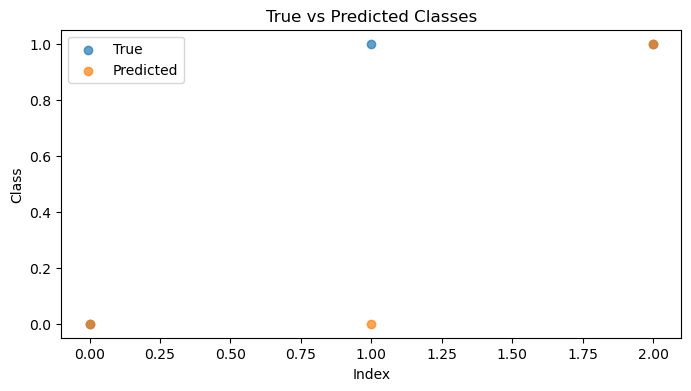

In [6]:
#a1-2
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Replace this with actual data loading code (make sure your dataset is loaded here)
# Example: df = pd.read_csv('your_dataset.csv')

# Dummy dataset for illustration purposes (replace with your real dataset)
data = {'LBE': [5.1, 4.9, 6.7, 7.2, 5.9, 6.4, 4.7, 6.8, 5.2, 6.5],
        'CLASS': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Select a single feature
single_feature = ['LBE']

# Prepare the features (X) and target (y)
X = df[single_feature]  # Feature matrix with one feature
y = df['CLASS']         # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model by calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with {single_feature[0]}: {accuracy:.2f}')

# Optional: Visualize the true vs predicted classes
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, label="True", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7)
plt.title('True vs Predicted Classes')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()


In [10]:
#a2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'CTG.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values in selected features
data = data.dropna(subset=['Mean', 'Variance', 'Median', 'Max'])

# Define the features (X) and target (y)
X = data[['Mean', 'Variance', 'Median']]  # Features: Mean, Variance, and Median
y = data['Max']                           # Target: Max

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Define MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Training set metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R²: {r2_train}")

print("\nTest set metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R²: {r2_test}")


Training set metrics:
MSE: 195.77521913984228, RMSE: 13.991969809138464, MAPE: 6.0233470877648, R²: 0.3814900901499154

Test set metrics:
MSE: 197.20807059668948, RMSE: 14.043079099566786, MAPE: 6.241588997600723, R²: 0.4241900303688295


In [12]:
#a3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'CTG.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Drop rows with missing values (optional, you can handle missing values differently)
data = data.dropna()

# A3: Use more than one attribute (or all attributes) for regression
# Define the features (X) and target (y)
X = data[['Mean', 'Variance', 'Min', 'Max', 'Mode']]  # Example of multiple attributes
y = data['Max']  # Target: Max

# You can also use all attributes by commenting the above line and uncommenting the one below:
# X = data.drop(columns=['Max', 'FileName', 'Date', 'SegFile'])  # Exclude non-numerical columns and target column 'Max'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Define MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Training set metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R²: {r2_train}")

print("\nTest set metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R²: {r2_test}")


Training set metrics:
MSE: 2.797579191409668e-28, RMSE: 1.672596541730751e-14, MAPE: 5.912064564056527e-15, R²: 1.0

Test set metrics:
MSE: 2.882268126193428e-28, RMSE: 1.6977243964181668e-14, MAPE: 5.936996557969996e-15, R²: 1.0


In [14]:
#a4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'CTG.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Drop target variable and non-numerical columns (for clustering purposes)
X = data.drop(columns=['Max', 'FileName', 'Date', 'SegFile', 'CLASS', 'NSP'])  # Remove target and non-numerical columns

# Handle any missing values if they exist
X = X.dropna()

# Split the data into training and test sets (though only X_train is needed for clustering)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

# Output cluster labels and cluster centers
print("Cluster labels:\n", kmeans.labels_)
print("\nCluster centers:\n", kmeans.cluster_centers_)


Cluster labels:
 [1 0 0 ... 0 0 0]

Cluster centers:
 [[ 3.14767296e+02  1.11285714e+03  1.33276730e+02  1.33276730e+02
   2.74393531e+00  1.07421384e+01  3.12129380e+00  4.77026056e+01
   1.30727763e+00  1.05893980e+01  8.80053908e+00  1.32614555e+00
  -1.21430643e-17  9.07457323e-02  0.00000000e+00  7.20539084e+01
   9.22704403e+01  4.17160827e+00  2.98292902e-01  1.37855346e+02
   1.35470800e+02  1.38663073e+02  1.74186882e+01  3.45911950e-01
   1.76100629e-01  2.78526505e-01  2.51572327e-02  4.49236298e-02
   3.50404313e-02  1.31176999e-01  1.06019766e-01  3.68373765e-02
   4.76190476e-02  1.18598383e-01]
 [ 1.98504429e+03  2.85967462e+03  1.32844974e+02  1.32844974e+02
   2.74275980e+00  1.04770017e+00  4.83304940e+00  4.51942078e+01
   1.37427598e+00  7.86541738e+00  7.25144804e+00  2.00000000e+00
   1.19250426e-02  2.02725724e-01  0.00000000e+00  6.76541738e+01
   9.53168654e+01  3.79897785e+00  3.27086882e-01  1.36265758e+02
   1.32618399e+02  1.36391823e+02  2.14258944e+01  2.

In [15]:
#a5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
file_path = 'CTG.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Drop target variable and non-numerical columns (for clustering purposes)
X = data.drop(columns=['Max', 'FileName', 'Date', 'SegFile', 'CLASS', 'NSP'])  # Remove target and non-numerical columns

# Handle any missing values if they exist
X = X.dropna()

# Split the data into training and test sets (though only X_train is needed for clustering)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

# Calculate clustering evaluation metrics
silhouette = silhouette_score(X_train, kmeans.labels_)
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
db_index = davies_bouldin_score(X_train, kmeans.labels_)

# Output metrics
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.6684754527837818
Calinski-Harabasz Score: 5845.324834276928
Davies-Bouldin Index: 0.4736976363295373


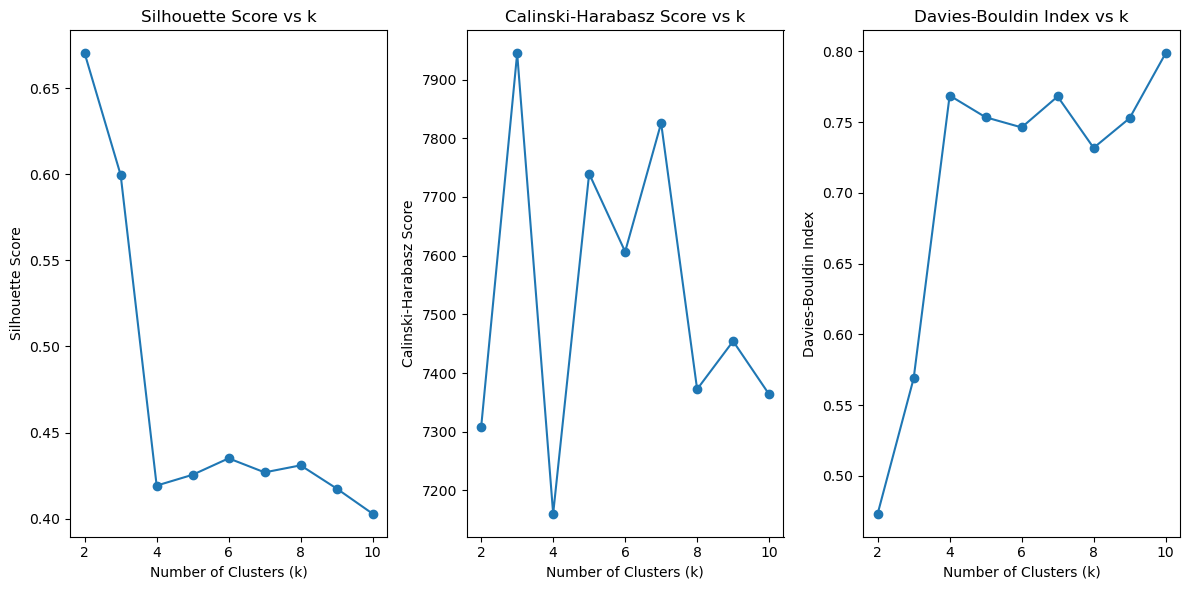

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'CTG.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Drop target variable and non-numerical columns
X = data.drop(columns=['Max', 'FileName', 'Date', 'SegFile', 'CLASS', 'NSP'])  # Remove target and non-numerical columns

# Handle any missing values if they exist
X = X.dropna()

# Initialize lists to store the evaluation metrics for each k
silhouette_scores = []
ch_scores = []
db_indexes = []
k_values = list(range(2, 11))  # You can modify the range for different k values

# Perform K-means clustering for each k and compute the evaluation metrics
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    
    silhouette_scores.append(silhouette_score(X, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))
    db_indexes.append(davies_bouldin_score(X, labels))

# Plot the evaluation metrics for each k
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_indexes, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


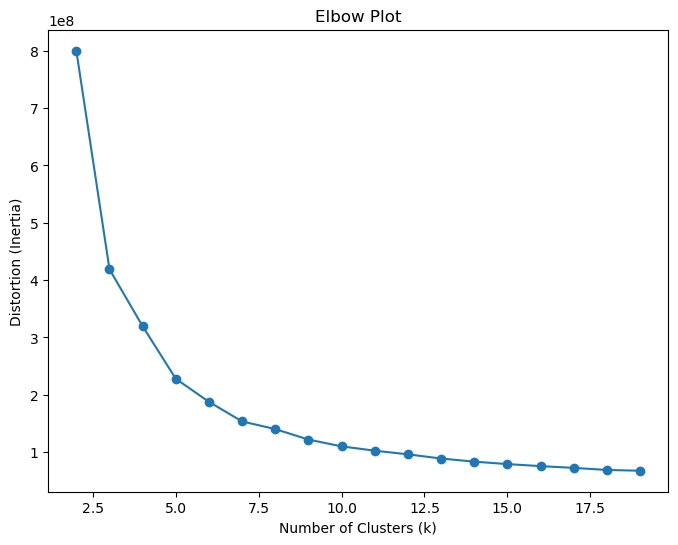

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'CTG.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Drop target variable and non-numerical columns
X = data.drop(columns=['Max', 'FileName', 'Date', 'SegFile', 'CLASS', 'NSP'])  # Remove target and non-numerical columns

# Handle any missing values if they exist
X = X.dropna()

# Initialize a list to store the distortions (inertia)
distortions = []

# Perform K-means clustering for different values of k and compute the distortions (inertia)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve (distortions vs. k)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.show()
